In [55]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
from scipy.linalg import svd
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
from nltk.corpus import stopwords
stop_li = stopwords.words("english")

In [22]:
import pandas as pd
df=pd.read_csv("datafor6.csv",usecols=["Documnet no","Sentence"])

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(df["Sentence"].values).todense() 

In [24]:
vectors.shape
li1=["Document1","Document2","Document3","Document4","Document5"]
df_new=pd.DataFrame(columns=vectorizer.get_feature_names())
df_new["Documnet_name"]=li1
df_new=df_new.set_index("Documnet_name")
c=0
for i in li1:
    df_new.loc[i]=vectors[c]
    c+=1

In [29]:
df_new

,advantage,afghan,also,america,car,coming,company,controversy,economic,elevated,...,service,share,shelter,source,speaking,strong,tax,urged,want,website
Documnet_name,,,,,,,,,,,,,,,,,,,,,
Document1,0,1,0,1,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,1,0
Document2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
Document3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
Document4,1,0,1,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Document5,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [5]:
li_vocab=vectorizer.get_feature_names()

In [6]:
tfidf_transformer = TfidfTransformer()
datfidf = tfidf_transformer.fit_transform(vectors)

In [35]:
temp=datfidf.toarray()

In [7]:
from scipy.linalg import svd
s = svd(datfidf.todense(),full_matrices=False)

In [8]:
u=s[0]
m=np.diag(s[1])
v=s[2]

In [9]:
u.shape

(5, 5)

In [10]:
m.shape

(5, 5)

In [11]:
v.shape

(5, 48)

In [12]:
lo=s[2]

In [44]:
def search(x):
    print("The documents are: ")
    for i in range(5):
        print(df.loc[i,"Documnet no"] + "  "+df.loc[i,"Sentence"])
    li_test=[]
    #for i in x.split(" "):
        #li_test.append([y for y in lemmatizer.lemmatize(i.lower()).split(" ") if y not in stop_li])
    x=lemmatizer.lemmatize(x.lower())
    word_vector=vectors[:,li_vocab.index(x)]
    indices=[]
    final=np.dot(m,word_vector)
    final=list(final)
    finaln=[]
    for i in range(final.__len__()):
        finaln.append([final[i],"Document no {x}".format(x=i+1)])
    finaln=sorted(finaln,key=lambda x:x[0],reverse=True)
    print("The most relevant retrieved for the query '{a}' is: Document {x}".format(a=x,x=finaln[0][1]))
    print(" ")
    print(" ")
    print(list(finaln))

In [46]:
search("infosys")

The documents are: 
Document1  source said america want india share maximum possible ground intelligence give shelter afghan
Document2  speaking coming festive season maharashtra mayor urged people remain home
Document3  infosys controversy related government new income tax filing website
Document4  new car company lack advantage also lack sale service infrastructure
Document5  india economic growth remain strong coming quarter inflation likely remain elevated level
The most relevant retrieved for the query 'infosys' is: Document Document no 3
 
 
[[matrix([[1.]]), 'Document no 3'], [matrix([[0.]]), 'Document no 1'], [matrix([[0.]]), 'Document no 2'], [matrix([[0.]]), 'Document no 4'], [matrix([[0.]]), 'Document no 5']]


In [6]:
df["Sentence"].values

array(['source said america want india share maximum possible ground intelligence give shelter afghan',
       'speaking coming festive season maharashtra mayor urged people remain home',
       'infosys controversy related government new income tax filing website',
       'new car company lack advantage also lack sale service infrastructure',
       'india economic growth remain strong coming quarter inflation likely remain elevated level'],
      dtype=object)

In [47]:
import pandas as pd
df=pd.read_csv("train_classify.csv",usecols=["tweet","topic"])

In [48]:
df=df[:1000]
df=df.sample(frac=1)

In [49]:

df1=pd.DataFrame({"tweet":[],"topic":[]})
for i in range(1000):
    c=0
    if df.loc[i,"topic"]==0 and c<=100:
        df1=df1.append(df.loc[i])
        c+=1
for i in range(1000):
    c=0
    if df.loc[i,"topic"]==1 and c<=100:
        df1=df1.append(df.loc[i])
        c+=1
for i in range(1000):
    c=0
    if df.loc[i,"topic"]==2 and c<=100:
        df1=df1.append(df.loc[i])
        c+=1

In [56]:
vectorizer=TfidfVectorizer()
trainX1 = vectorizer.fit_transform(df1.tweet) 

In [57]:
from sklearn.decomposition import TruncatedSVD
s = TruncatedSVD(n_components=2,n_iter=7,random_state=42)
mats=s.fit_transform(trainX1.toarray())

In [58]:
x_cord=mats[:,0]
y_cord=mats[:,1]

<AxesSubplot:xlabel='X_CORD', ylabel='Y_CORD'>

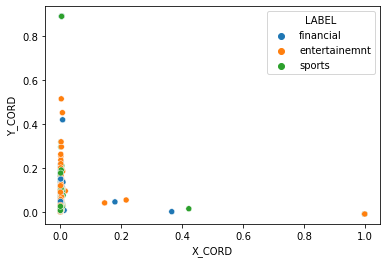

In [59]:
import seaborn as sns
import pandas as pd
df=pd.DataFrame({"X_CORD":[],"Y_CORD":[]})
df["X_CORD"]=x_cord
df["Y_CORD"]=y_cord
df["LABEL"]=df1["topic"]
for i in range(df.shape[0]):
    if(df.loc[i,"LABEL"]==0):
        df.loc[i,"LABEL"]="sports"
    elif(df.loc[i,"LABEL"]==1):
        df.loc[i,"LABEL"]="entertainemnt"
    if(df.loc[i,"LABEL"]==2):
        df.loc[i,"LABEL"]="financial"
sns.scatterplot(data=df, x="X_CORD", y="Y_CORD",hue="LABEL")